# Filtro FIR 03/10/2024

### El orden del filtro repercute en la señal filtrada, al orden ser mayor, disminuye la amplitud de la señal filtrada

#### Al orden ser 200 la señal disminuye su amplitud de forma considerable, con orden de 0 - 10 se puede notar eso

Introduzca el orden del filtro:  50
Introduzca la frecuencia de corte en radianes (por ejemplo, 0.3*np.pi):  0.3


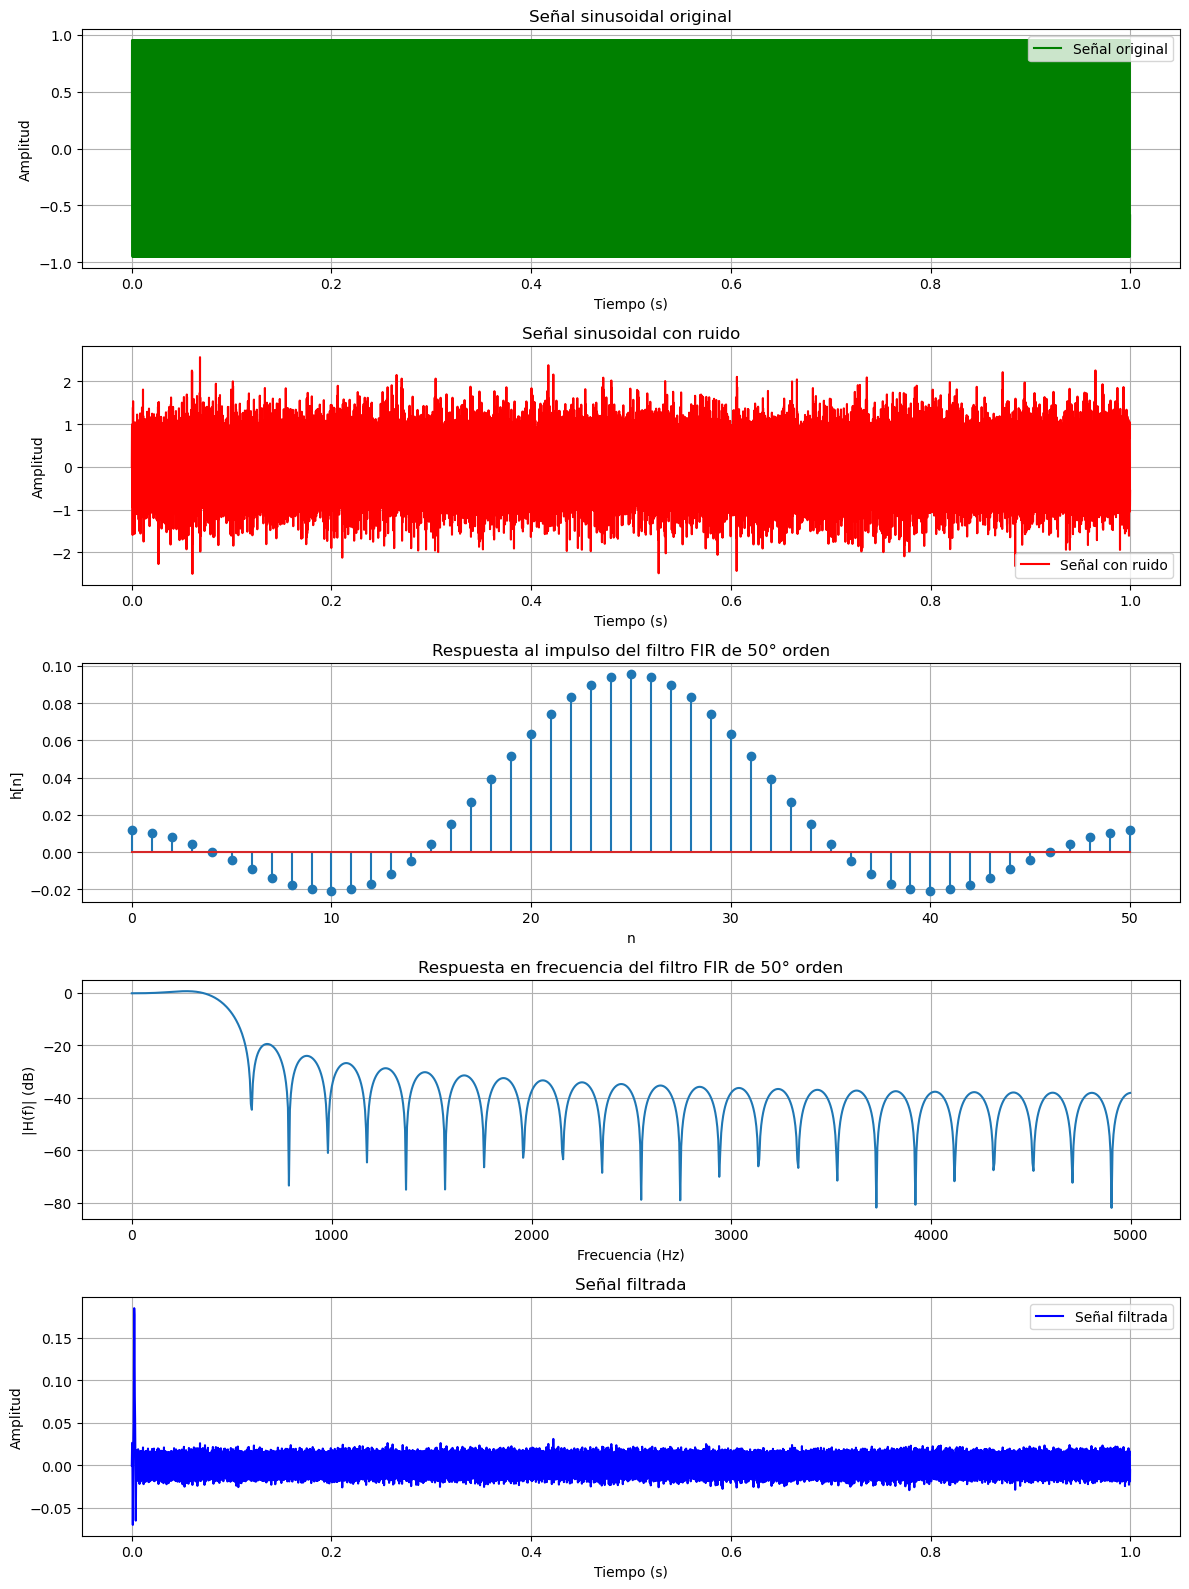

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, freqz, lfilter

# Parámetros del filtro
M = int(input('Introduzca el orden del filtro: '))
wc = eval(input('Introduzca la frecuencia de corte en radianes (por ejemplo, 0.3*np.pi): '))  # Evalúa la expresión en radianes

# Diseño del filtro FIR pasa bajas
n = np.arange(0, M+1)  # Vector de índices
h_LP = np.zeros(M+1)  # Inicializar el filtro con ceros para evitar errores de división

# Calcular los coeficientes del filtro
for i in range(M+1):
    if i == M/2:  # Evitar la división por cero en el punto central
        h_LP[i] = wc / np.pi
    else:
        h_LP[i] = np.sin(wc * (i - M / 2)) / (np.pi * (i - M / 2))

# Parámetros de la señal
fc = 3000  # Frecuencia de corte (en Hz)
fs = 10000  # Frecuencia de muestreo (en Hz)
t = np.arange(0, 1, 1/fs)  # Tiempo de 1 segundo

# Generación de la señal sinusoidal y ruido aleatorio de alta frecuencia
f_sin = 1000  # Frecuencia de la señal sinusoidal
sin_signal = np.sin(2 * np.pi * f_sin * t)  # Señal sinusoidal pura de 1000 Hz

# Generación de ruido aleatorio con frecuencia mayor a 4000 Hz
noise = np.random.randn(len(t))  # Ruido blanco aleatorio
b, a = butter(4, 4000 / (fs / 2), btype='high')  # Filtro pasa altas para aislar ruido > 4000 Hz
high_freq_noise = filtfilt(b, a, noise)  # Ruido filtrado de alta frecuencia

# Señal ruidosa
noisy_signal = sin_signal + high_freq_noise  # Señal original con ruido agregado

# Filtrado de la señal ruidosa con el filtro FIR pasa bajas
filtered_signal = lfilter(h_LP, 1, noisy_signal)  # Aplica filtro FIR a la señal con ruido

# Visualización
plt.figure(figsize=(12, 16))  # Ajustar el tamaño para incluir las gráficas

# 1. Señal sinusoidal original
plt.subplot(5, 1, 1)
plt.plot(t, sin_signal, 'g', label='Señal original')
plt.title('Señal sinusoidal original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# 2. Señal con ruido
plt.subplot(5, 1, 2)
plt.plot(t, noisy_signal, 'r', label='Señal con ruido')
plt.title('Señal sinusoidal con ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# 3. Respuesta al impulso del filtro
plt.subplot(5, 1, 3)
plt.stem(n, h_LP)  # Omitir 'use_line_collection=True' si no es compatible
plt.title(f'Respuesta al impulso del filtro FIR de {M}° orden')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid()

# 4. Respuesta en frecuencia del filtro
w, H_LP = freqz(h_LP, worN=1024, fs=fs)  # Calcula la respuesta en frecuencia
plt.subplot(5, 1, 4)
plt.plot(w, 20 * np.log10(np.abs(H_LP)))  # Magnitud de la respuesta en frecuencia en dB
plt.title(f'Respuesta en frecuencia del filtro FIR de {M}° orden')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('|H(f)| (dB)')
plt.grid()

# 5. Señal filtrada
plt.subplot(5, 1, 5)
plt.plot(t, filtered_signal, 'b', label='Señal filtrada')
plt.title('Señal filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# Mostrar las gráficas
plt.tight_layout()
plt.show()
